In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-booking-demand/hotel_bookings.csv


 # Import Necessary library

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Reading the Hotel Dataset

In [3]:
df=pd.read_csv('/kaggle/input/hotel-booking-demand/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Data Description:
* hotel (str) - Hotel (H1 = Resort Hotel or H2 = City Hotel)
* lead_time (int) - Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
* arrival_date_year (int) - Year of arrival date
* arrival_date_month (str) - Month of arrival date
* arrival_date_week_number (int) - Week number of year for arrival date
* arrival_date_day_of_month (int) - Day of arrival date
* stays_in_weekend_nights (int) - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* stays_in_week_nights (int) - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* adults (int) - Number of adults
* children (float) - Number of children
* babies (int) - Number of babies
* meal (str) - Type of meal booked. Categories are presented in standard hospitality meal packages: (Undefined/SC = no meal package, BB = Bed & Breakfast, HB = Half board – breakfast and one other meal - usually dinner, FB = Full board – breakfast, lunch and dinner)
* country (str) - Country of origin. Categories are represented in the ISO 3155–3:2013 format
* market_segment (str) - Market segment designation (TA = Travel Agents, TO = Tour Operators)
* distribution_channel (str) - Booking distribution channel (TA = Travel Agents, TO = Tour Operators)
* is_repeated_guest (int) - Value indicating if the booking name was from a repeated guest (1) or not (0)
* previous_cancellations (int) - Number of previous bookings that were cancelled by the customer prior to the current booking
* previous_bookings_not_canceled (int) - Number of previous bookings not cancelled by the customer prior to the current booking
* reserved_room_type (str) - Code of room type reserved. Code is presented instead of designation for anonymity reasons
* assigned_room_type (str) - Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonnymity reasons
* booking_changes (int) - Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
* deposit_type (str) - Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: (No Deposit = no deposit was made, Non Refund = a deposit was made in the value of the total stay cost, Refundable = a deposit was made with a value under the total cost of stay)
* agent (float) - ID of the travel agency that made the booking
* company (float) - ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
* days_in_waiting_list (int) - Number of days the booking was in the waiting list before it was confirmed to the customer
* customer_type (str) - Type of booking, assuming one of four categories: (Contract = when the booking has an allotment or other type of contract associated to it, Group = when the booking is associated to a group, Transient = when the booking is not part of a group or contract, and is not associated to other transient booking, Transient-party = when the booking is transient, but is associated to at least other transient booking
* adr (float) - Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
* required_car_parking_spaces (int) - Number of car parking spaces required by the customer
* total_of_special_requests (int) - Number of special requests made by the customer (e.g. twin bed or high floor)
* reservation_status (str) - Reservation last status, assuming one of three categories: (Canceled = booking was canceled by the customer, Check-Out = customer has checked in but already departed, No-Show = customer did not check-in and did inform the hotel of the reason why)
* reservation_status_date (str) - Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

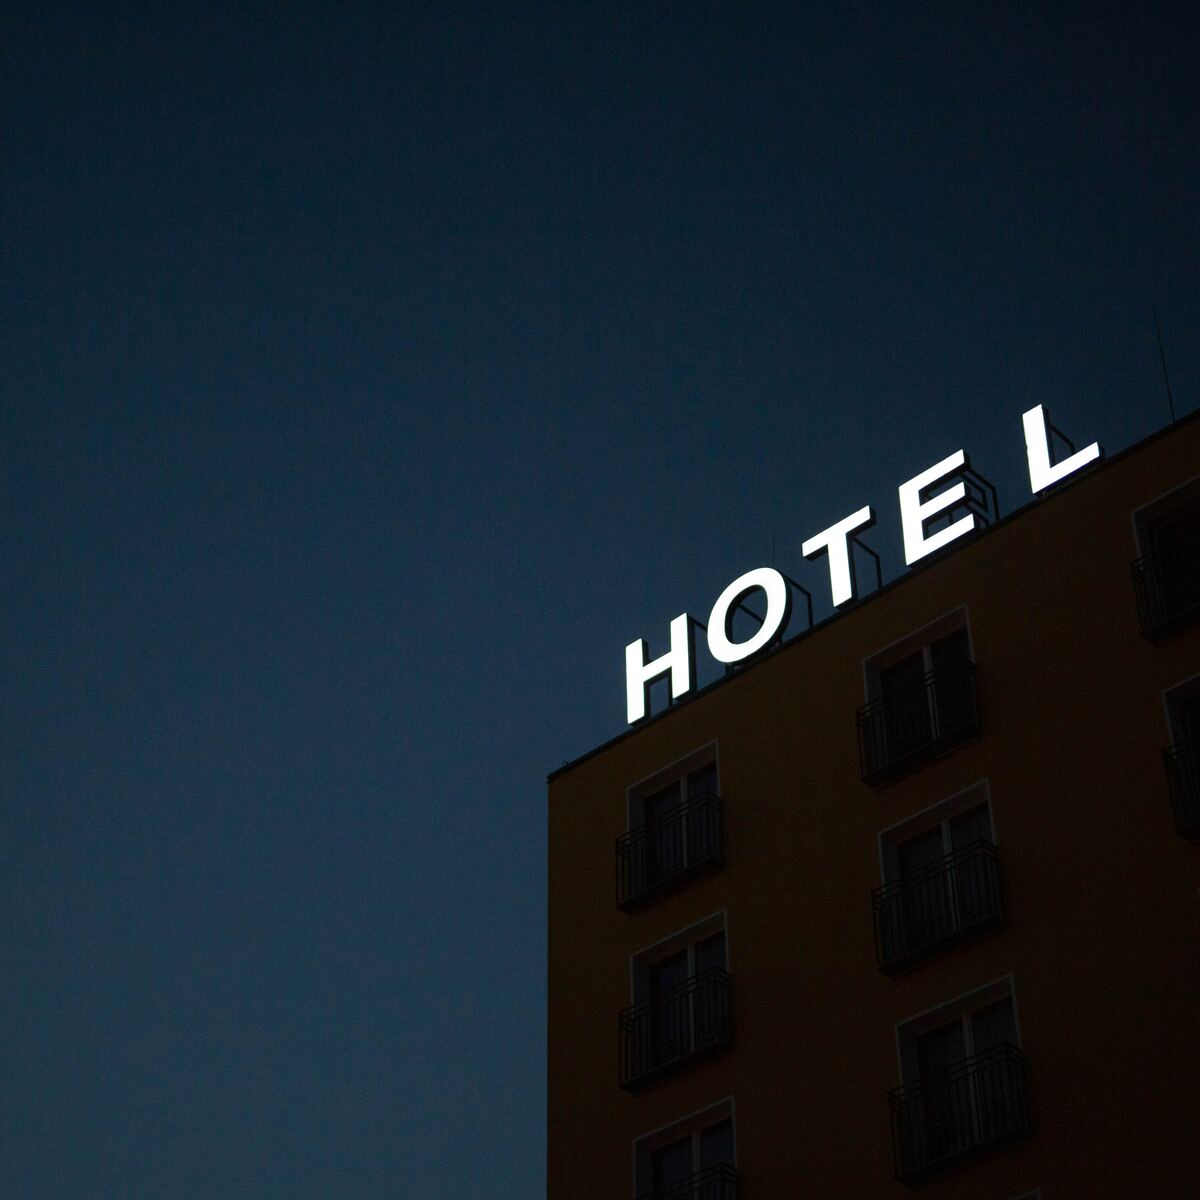

### Showing the number of rows & columns in the dataset using shape

In [4]:
df.shape

(119390, 32)

### Checking the data type of each column by using dtypes

In [5]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

 ### Check the informations about the dataset using info() function

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### This data contains 4 columns of float type , 16 columns of int type and 12 column of object type
the memory requirement for this data set is 29.1+ MB

### Showing all the column names

In [7]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

### Showing Statistical information of the dataset using describe() function

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [9]:
df.describe(include="object").T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


#### Showing Co-relation within the data b/w the columns using corr() function

In [10]:
df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


<AxesSubplot:>

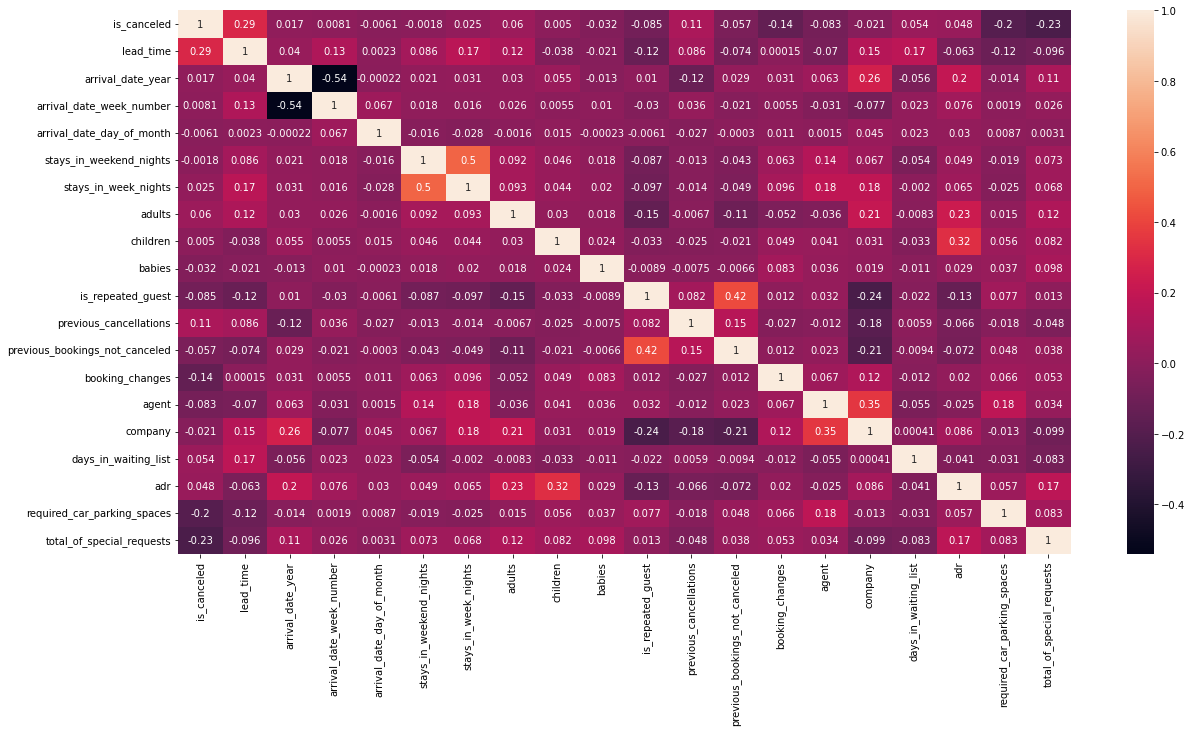

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

## DATA CLEANING

### Checking the duplicacy in our dataset

In [12]:
df.duplicated().value_counts()

False    87396
True     31994
dtype: int64

### Checking is their any null value present in our Dataset Column wise in % form

In [13]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## Missing values
* Country : 488
* Agent : 16340
* Company : 112593
* Children : 4

## Percentage of missing values

In [14]:
df.isnull().sum()*100/df.shape[0]

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [15]:
company_name= df.isnull().sum().rename('num_of_missing').reset_index()
company_name.columns = ['feature', 'num_of_missing']
company_name['percentage_of_missings'] = company_name['num_of_missing'].apply(lambda x:x/len(df))
company_name.sort_values(by='percentage_of_missings',ascending=False)

,feature,num_of_missing,percentage_of_missings
24,company,112593,0.943069
23,agent,16340,0.136862
13,country,488,0.004087
10,children,4,0.000034
19,reserved_room_type,0,0.000000
20,assigned_room_type,0,0.000000
21,booking_changes,0,0.000000
22,deposit_type,0,0.000000
0,hotel,0,0.000000
17,previous_cancellations,0,0.000000


<AxesSubplot:xlabel='feature', ylabel='percentage_of_missings'>

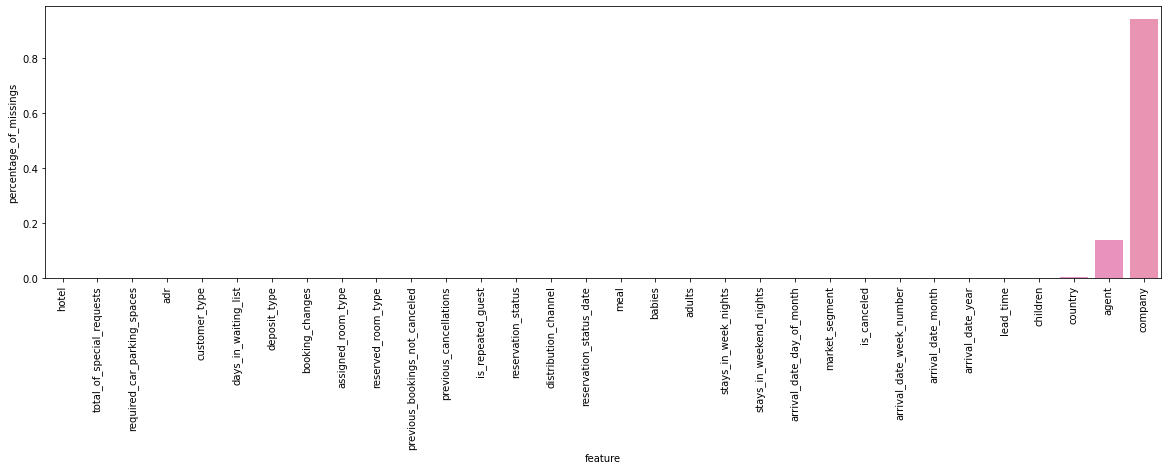

In [16]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(x='feature',y='percentage_of_missings',data=company_name.sort_values(by='percentage_of_missings'))

### Company has maxmimum no of missing values

Missing values in percentage
* Children : 0.003350%
* Country : 0.408744%
* Agent : 13.686238%
* Company : 94.306893%

### Company column has 94.306893% of missing values so we are drop this column.

In [17]:
df.drop(columns=['company'],inplace=True)

### Company column was removed after that 31 columns is left

In [18]:
df.shape

(119390, 31)

### Filling 'children,country' columns by using fillna() function

In [19]:
df['children'].fillna(df['children'].median(),inplace=True)

In [20]:
df['country'].mode()

0    PRT
dtype: object

In [21]:
df["country"].fillna("PRT",inplace=True)

### Missing value of agent is filled

In [22]:
df['agent'].fillna(df['agent'].median(),inplace=True)

In [23]:
df['agent'].isnull().sum()

0

### Now data is clean after dropping and filled the missing values





#### Lets find some Insights:

In [24]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,14.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,14.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,14.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


### 1 indicated the cancellation and 0 indicated the not cancelled

In [25]:
x=df.groupby('hotel')['is_canceled'].value_counts()

#### percentage of cancellation of city hotel: 27.725940195996316
#### percentage of cancellation of resort hotel : 24.238210905435967

In [26]:
print('percentage of cancellation of city hotel:',x[1].sum()*100/df.shape[0])
print('percentage of cancellation of resort hotel :',x[2].sum()*100/df.shape[0])

percentage of cancellation of city hotel: 27.725940195996316
percentage of cancellation of resort hotel : 24.238210905435967


* As we can see maxmimum no of cancellation is in city hotel as compare to resort hotel
* But we notice also maximum no of 0 cancellation is also of city hotel as compare to city hotel

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


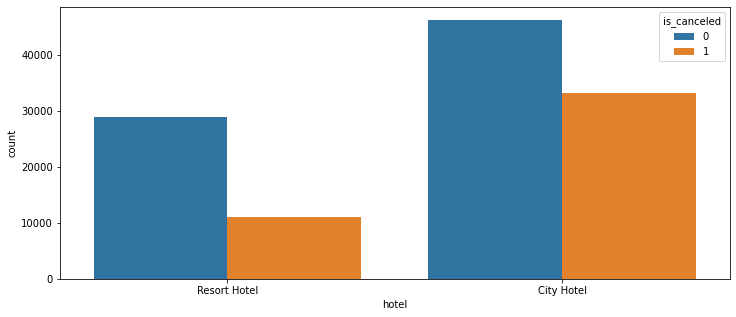

In [27]:
plt.figure(figsize=(12,5))
sns.countplot('hotel',hue='is_canceled',data=df);

### Peak year for Resort Hotel is 2016 in last 3 years
### Peak year for City Hotel is is 2016 in last 3 years

<AxesSubplot:xlabel='arrival_date_year', ylabel='count'>

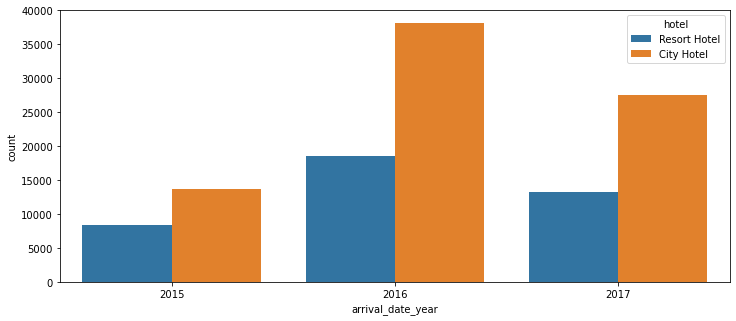

In [28]:
plt.figure(figsize=(12,5))
sns.countplot(x='arrival_date_year',hue='hotel',data=df)

 ### August is the most busiest month

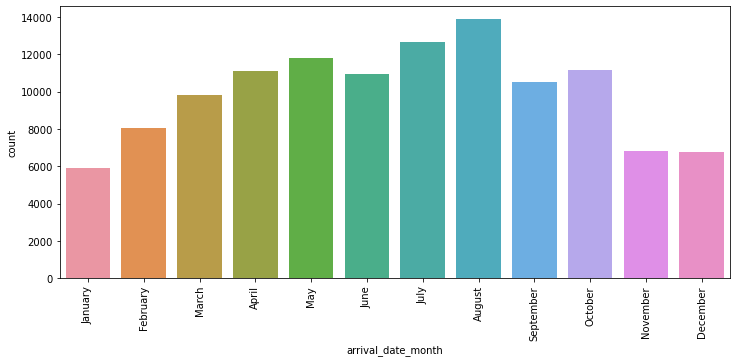

In [29]:
plt.figure(figsize=(12,5))
sns.countplot(x='arrival_date_month',order=["January","February","March","April","May","June","July","August","September","October","November","December"],data=df)
plt.xticks(rotation=90);

## How many guest arrived per month in each hotel?

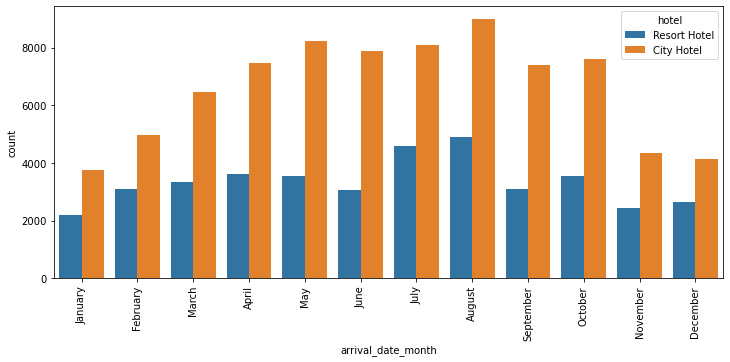

In [30]:
plt.figure(figsize=(12,5))
sns.countplot(x='arrival_date_month',hue='hotel',order=["January","February","March","April","May","June","July","August","September","October","November","December"],data=df)
plt.xticks(rotation=90);

### How many guest arrived in a year per month?

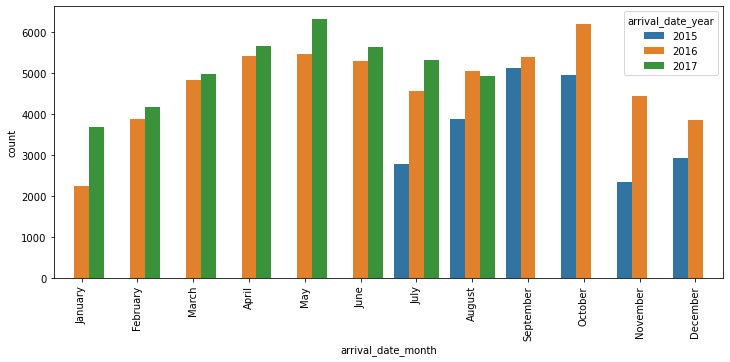

In [31]:
plt.figure(figsize=(12,5))
sns.countplot(x='arrival_date_month',hue='arrival_date_year',order=["January","February","March","April","May","June","July","August","September","October","November","December"],data=df)
plt.xticks(rotation=90);

### How many guest arrived in each hotel month per year in each hotel?

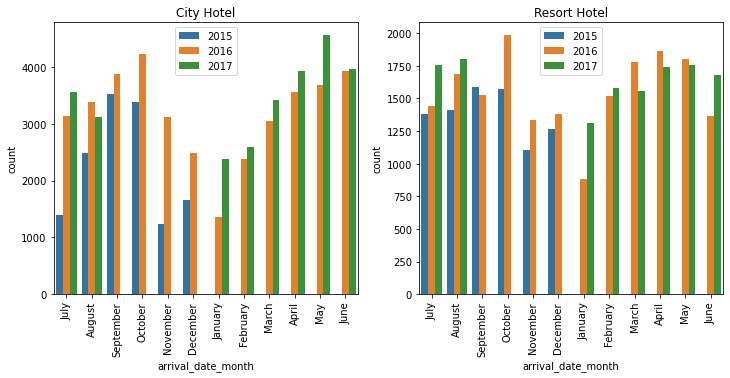

In [32]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x=df[df["hotel"]=="City Hotel"]["arrival_date_month"], data=df, hue="arrival_date_year")
plt.title('City Hotel')
plt.legend(loc='upper center')
plt.xticks(rotation=90);

plt.subplot(1,2,2)
sns.countplot(x=df[df["hotel"]=="Resort Hotel"]["arrival_date_month"], data=df, hue="arrival_date_year")
plt.title('Resort Hotel')
plt.legend(loc='upper center')
plt.xticks(rotation=90);

* Peak month in City Hotel : 2015/September, 2016/October and 2017/May
* Peak month in Resort Hotel : 2015/September, 2016/October and 2017/August

### Maximum people arrived date in the month

<AxesSubplot:xlabel='arrival_date_day_of_month', ylabel='count'>

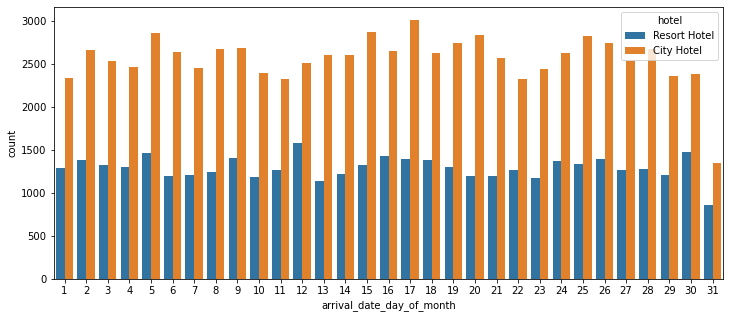

In [33]:
plt.figure(figsize=(12,5))
sns.countplot(x='arrival_date_day_of_month',hue='hotel',data=df)

* Maximum no of people was arrived on date 17 date of City Hotel
* Maximum no of people was arraived on date 12 date of Resort Hotel

### Number of stays in weekend nights in each hotel?

<AxesSubplot:xlabel='stays_in_weekend_nights', ylabel='count'>

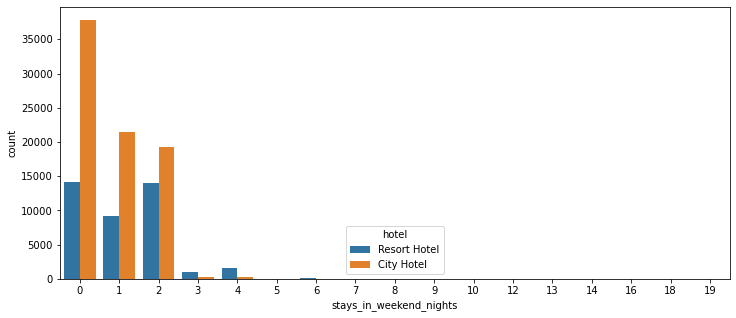

In [34]:
plt.figure(figsize=(12,5))
sns.countplot(x='stays_in_weekend_nights',hue='hotel',data=df)

In [35]:
df.groupby('hotel')['stays_in_weekend_nights'].value_counts()

hotel         stays_in_weekend_nights
City Hotel    0                          37817
              1                          21434
              2                          19333
              3                            323
              4                            297
              5                             44
              6                             40
              8                             24
              7                              6
              9                              6
              10                             2
              14                             2
              13                             1
              16                             1
Resort Hotel  0                          14181
              2                          13975
              1                           9192
              4                           1558
              3                            936
              6                            113
              8       

In [36]:
df.groupby(['hotel','arrival_date_month'])['stays_in_weekend_nights'].agg(['min','max'])

min  max
hotel        arrival_date_month          
City Hotel   April                 0    6
             August                0    9
             December              0    8
             February              0    9
             January               0   13
             July                  0   14
             June                  0    4
             March                 0   14
             May                   0    6
             November              0    9
             October               0    6
             September             0   16
Resort Hotel April                 0    9
             August                0   18
             December              0    8
             February              0   13
             January               0   16
             July                  0   19
             June                  0    8
             March                 0   12
             May                   0    6
             November              0   10
             October               0    9
             September             0   13

### People with 0 stays in City hotel

In [37]:
df1=df[(df["hotel"]=="City Hotel")&(df["stays_in_weekend_nights"]==0)]
df1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,0,No Deposit,6.0,0,Transient,0.00,0,0,Check-Out,2015-07-03
40061,City Hotel,1,88,2015,July,27,1,0,4,2,...,0,No Deposit,9.0,0,Transient,76.50,0,1,Canceled,2015-07-01
40062,City Hotel,1,65,2015,July,27,1,0,4,1,...,0,No Deposit,9.0,0,Transient,68.00,0,1,Canceled,2015-04-30
40064,City Hotel,1,100,2015,July,27,2,0,2,2,...,0,No Deposit,9.0,0,Transient,76.50,0,1,Canceled,2015-04-02
40065,City Hotel,1,79,2015,July,27,2,0,3,2,...,0,No Deposit,9.0,0,Transient,76.50,0,1,Canceled,2015-06-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119350,City Hotel,0,286,2017,August,35,30,0,4,2,...,0,No Deposit,9.0,0,Transient,112.05,0,3,Check-Out,2017-09-03
119351,City Hotel,0,72,2017,August,35,31,0,3,2,...,0,No Deposit,14.0,0,Transient,134.82,0,1,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


### Only one adult people stays in Resort hotel but max no of stays in weekend is 19.

In [38]:
df1=df[(df["hotel"]=="Resort Hotel")&(df["stays_in_weekend_nights"]==19)]
df1.T

,14038
hotel,Resort Hotel
is_canceled,0
lead_time,126
arrival_date_year,2016
arrival_date_month,July
arrival_date_week_number,28
arrival_date_day_of_month,5
stays_in_weekend_nights,19
stays_in_week_nights,50
adults,1


In [39]:
df1=df[(df["hotel"]=="City Hotel")&(df["stays_in_weekend_nights"]==16)]
df1.T

,101794
hotel,City Hotel
is_canceled,0
lead_time,140
arrival_date_year,2016
arrival_date_month,September
arrival_date_week_number,39
arrival_date_day_of_month,22
stays_in_weekend_nights,16
stays_in_week_nights,41
adults,0


## Number of stays in week nights in each hotel?

<AxesSubplot:xlabel='stays_in_week_nights', ylabel='count'>

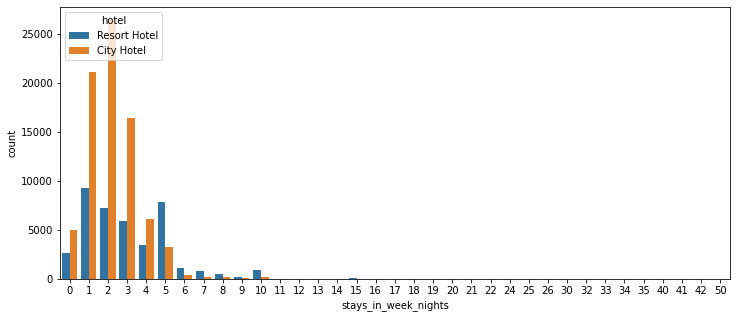

In [40]:
plt.figure(figsize=(12,5))
sns.countplot(x='stays_in_week_nights',data=df,hue='hotel')

In [41]:
df.groupby(['hotel','arrival_date_month'])['stays_in_week_nights'].agg(['max'])

max
hotel        arrival_date_month     
City Hotel   April                15
             August               20
             December             20
             February             21
             January              30
             July                 34
             June                 11
             March                35
             May                  13
             November             25
             October              17
             September            41
Resort Hotel April                24
             August               42
             December             21
             February             32
             January              40
             July                 50
             June                 20
             March                26
             May                  15
             November             25
             October              21
             September            33

In [42]:
len(df[(df["hotel"]=="City Hotel")&(df["stays_in_week_nights"]==41)])

1

### In september month max stays in Resort hotel of 1 adult

In [43]:
df1=df[(df["hotel"]=="Resort Hotel")&(df["stays_in_week_nights"]==50)]
df1.T

,14038
hotel,Resort Hotel
is_canceled,0
lead_time,126
arrival_date_year,2016
arrival_date_month,July
arrival_date_week_number,28
arrival_date_day_of_month,5
stays_in_weekend_nights,19
stays_in_week_nights,50
adults,1


### How many adults have babies?

In [44]:
df.iloc[np.where((df["adults"]>0) & (df["babies"]>0))]["babies"].value_counts()      

1     897
2      15
10      1
9       1
Name: babies, dtype: int64

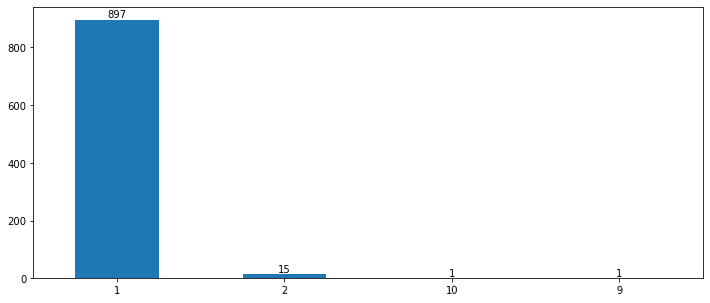

In [45]:
plt.figure(figsize=(12,5))
az=df.iloc[np.where((df["adults"]>0) & (df["babies"]>0))]["babies"].value_counts().plot(kind='bar')
az.bar_label(az.containers[0]);
plt.xticks(rotation=2);

* 1 adults have max no of babies

### How many adults have children?

In [46]:
df.iloc[np.where((df["adults"]>0) & (df["children"]>0))]["children"].astype('int').value_counts()

1     4857
2     3444
3       65
10       1
Name: children, dtype: int64

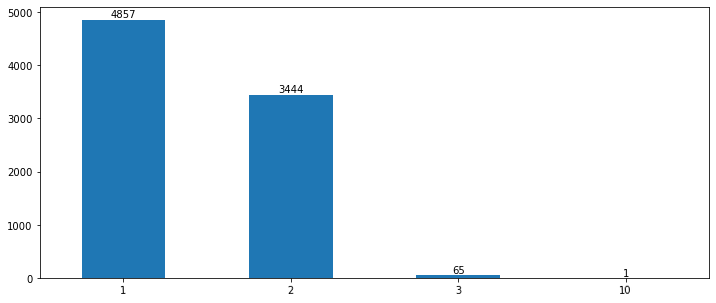

In [47]:
plt.figure(figsize=(12,5))
az=df.iloc[np.where((df["adults"]>0) & (df["children"]>0))]["children"].astype('int').value_counts().plot(kind='bar')
az.bar_label(az.containers[0]);
plt.xticks(rotation=2);

* 1 adults have maximum no of children

### Favourites meal of guests

In [48]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [49]:
k=df.iloc[np.where(df["adults"])]["meal"].value_counts()
k2=df.iloc[np.where(df["children"])]["meal"].value_counts()
k3=df.iloc[np.where(df["babies"])]["meal"].value_counts()

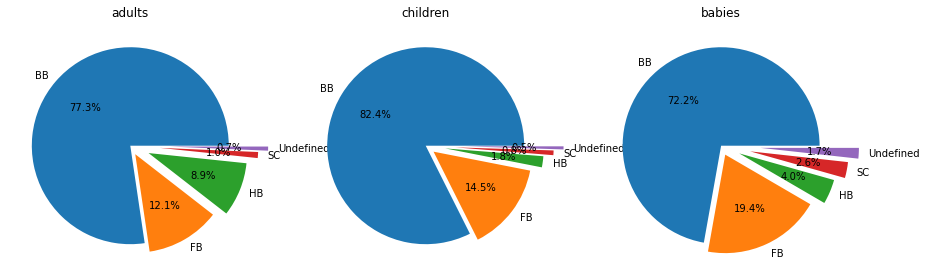

In [50]:
meal=['BB', 'FB', 'HB', 'SC', 'Undefined']
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.pie(x=k, data=df, labels=meal,explode=(0,0.1,0.2,0.3,0.4),autopct='%.1f%%');
plt.title('adults');

plt.subplot(1,3,2)
plt.pie(x=k2,data=df, labels=meal,explode=(0,0.1,0.2,0.3,0.4),autopct='%.1f%%');
plt.title('children');

 
plt.subplot(1,3,3)
plt.pie(x=k3,data=df,labels=meal,explode=(0,0.1,0.2,0.3,0.4),autopct='%.1f%%');
plt.title('babies');

* You can see that BB meal is most prefered by guests.

### Maximum no guests coming from which country?

In [51]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH', 

### Maxmimum no of guests are coming in city hotel from PRT(Portugal)

In [52]:
df[df['hotel']=='City Hotel']['country'].value_counts().sort_values(ascending=False)

PRT    30984
FRA     8804
DEU     6084
GBR     5315
ESP     4611
       ...  
MRT        1
KIR        1
TGO        1
SUR        1
COM        1
Name: country, Length: 166, dtype: int64

<AxesSubplot:>

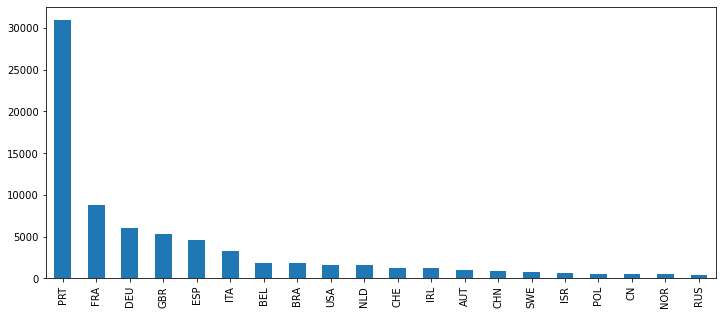

In [53]:
plt.figure(figsize=(12,5))
df[df['hotel']=='City Hotel']['country'].value_counts()[0:20].plot(kind='bar')

### Maxmimum no of guests are came in resort hotel from PRT(Portugal)

In [54]:
df[df['hotel']=='Resort Hotel']['country'].value_counts().sort_values(ascending=False)

PRT    18094
GBR     6814
ESP     3957
IRL     2166
FRA     1611
       ...  
EGY        1
PER        1
MAC        1
NPL        1
DJI        1
Name: country, Length: 125, dtype: int64

<AxesSubplot:>

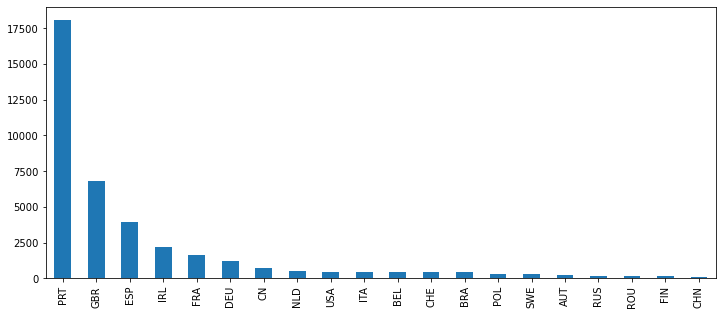

In [55]:
plt.figure(figsize=(12,5))
df[df['hotel']=='Resort Hotel']['country'].value_counts()[0:20].plot(kind='bar')

### 49078 guests came from PRT(Portugal) from both the hotels

In [56]:
len(df[df['country']=='PRT'])

49078

### Arrival date year as per country

In [57]:
df[df['arrival_date_year']==2015]['country'].value_counts().sort_values(ascending=False)

PRT    13440
ESP     1932
GBR     1356
FRA     1348
ITA      547
       ...  
KWT        1
GEO        1
ETH        1
PHL        1
ECU        1
Name: country, Length: 98, dtype: int64

In [58]:
df[df['arrival_date_year']==2016]['country'].value_counts().sort_values(ascending=False)

PRT    22593
GBR     5585
FRA     5165
ESP     4024
DEU     3865
       ...  
ZMB        1
PRY        1
SYC        1
AIA        1
HND        1
Name: country, Length: 151, dtype: int64

In [59]:
df[df['arrival_date_year']==2017]['country'].value_counts().sort_values(ascending=False)

PRT    13045
GBR     5188
FRA     3902
DEU     2898
ESP     2612
       ...  
LBY        1
SLE        1
SLV        1
PRI        1
COM        1
Name: country, Length: 149, dtype: int64

<AxesSubplot:>

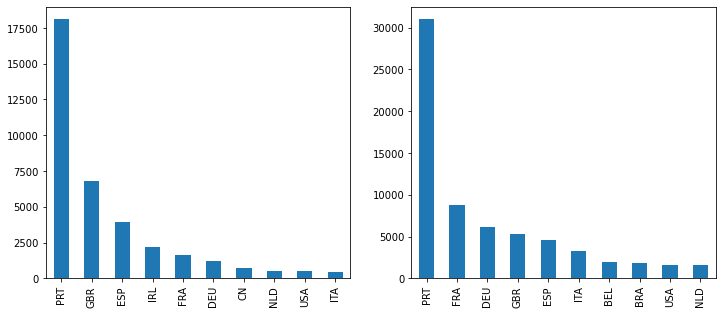

In [60]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
df[df['hotel']=='Resort Hotel']['country'].value_counts().head(10).plot(kind='bar')

plt.subplot(1,2,2)
df[df['hotel']=='City Hotel']['country'].value_counts().head(10).plot(kind='bar')

* Last years maximum no of arrival date year is from PRT('Portugal')

### Maximum cancellation in which month?

In [61]:
x1=df[df['is_canceled']==1]

<AxesSubplot:xlabel='arrival_date_month', ylabel='count'>

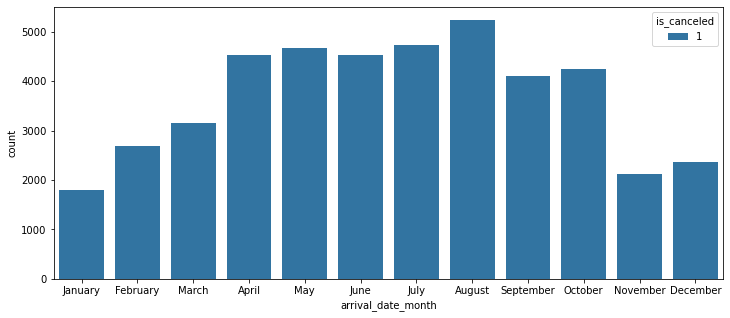

In [62]:
plt.figure(figsize=(12,5))
sns.countplot(x='arrival_date_month',hue='is_canceled',order=["January","February","March","April","May","June","July","August","September","October","November","December"],data=x1)

### Maximum cancellation in which year?

<AxesSubplot:xlabel='arrival_date_year', ylabel='count'>

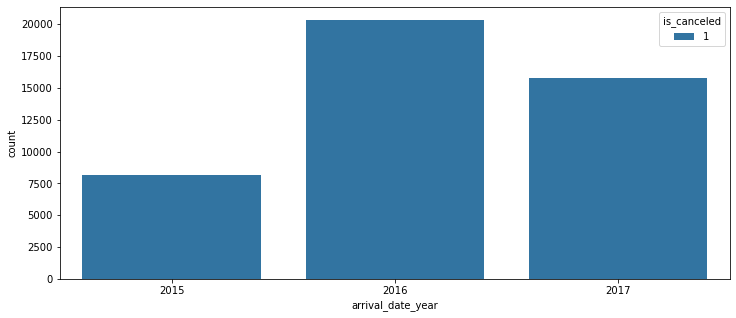

In [63]:
plt.figure(figsize=(12,5))
sns.countplot(x='arrival_date_year',hue='is_canceled',data=x1)

### Maxmium booking done by which market segmnent

In [64]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

<AxesSubplot:xlabel='market_segment', ylabel='count'>

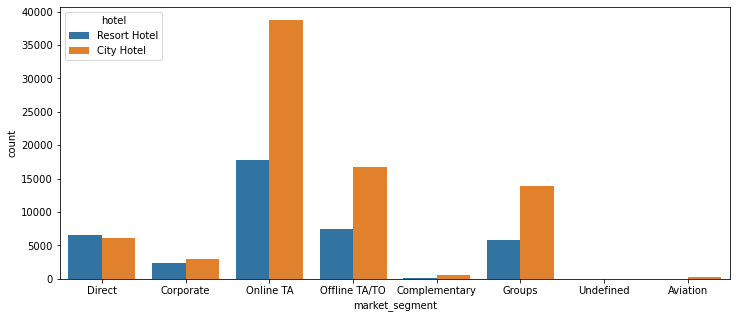

In [65]:
plt.figure(figsize=(12,5))
sns.countplot(x='market_segment',hue='hotel',data=df)

* As you can see maximum booking done by online TA of both resort and city hotel guests perfered online book by some Travel Agent.

In [66]:
df[df['market_segment']=='Online TA'] 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,No Deposit,240.0,0,Transient,82.00,0,1,Canceled,2015-05-06
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,0,No Deposit,240.0,0,Transient,123.00,0,0,Canceled,2015-06-23
11,Resort Hotel,0,35,2015,July,27,1,0,4,2,...,0,No Deposit,240.0,0,Transient,145.00,0,0,Check-Out,2015-07-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119382,City Hotel,0,135,2017,August,35,30,2,4,3,...,0,No Deposit,7.0,0,Transient,209.00,0,0,Check-Out,2017-09-05
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


* Last three year of booking maxmimum no of booking is by online Travel agent.
* Total 56477 guests use online booking half of the book are from online TA.

### Market segment by country

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


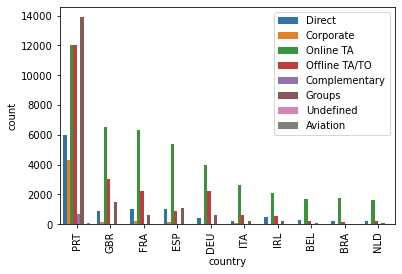

In [67]:
sns.countplot("country", data=df, hue="market_segment", order=df["country"].value_counts()[:10].index)
plt.legend(loc="upper right")
plt.xticks(rotation=90);

### Arrival date year leadtime according to the year

In [68]:
df['lead_time'].unique()

array([342, 737,   7,  13,  14,   0,   9,  85,  75,  23,  35,  68,  18,
        37,  12,  72, 127,  78,  48,  60,  77,  99, 118,  95,  96,  69,
        45,  40,  15,  36,  43,  70,  16, 107,  47, 113,  90,  50,  93,
        76,   3,   1,  10,   5,  17,  51,  71,  63,  62, 101,   2,  81,
       368, 364, 324,  79,  21, 109, 102,   4,  98,  92,  26,  73, 115,
        86,  52,  29,  30,  33,  32,   8, 100,  44,  80,  97,  64,  39,
        34,  27,  82,  94, 110, 111,  84,  66, 104,  28, 258, 112,  65,
        67,  55,  88,  54, 292,  83, 105, 280, 394,  24, 103, 366, 249,
        22,  91,  11, 108, 106,  31,  87,  41, 304, 117,  59,  53,  58,
       116,  42, 321,  38,  56,  49, 317,   6,  57,  19,  25, 315, 123,
        46,  89,  61, 312, 299, 130,  74, 298, 119,  20, 286, 136, 129,
       124, 327, 131, 460, 140, 114, 139, 122, 137, 126, 120, 128, 135,
       150, 143, 151, 132, 125, 157, 147, 138, 156, 164, 346, 159, 160,
       161, 333, 381, 149, 154, 297, 163, 314, 155, 323, 340, 35

Text(0.5, 1.0, 'Arrival Year\xa0and\xa0Lead\xa0Time')

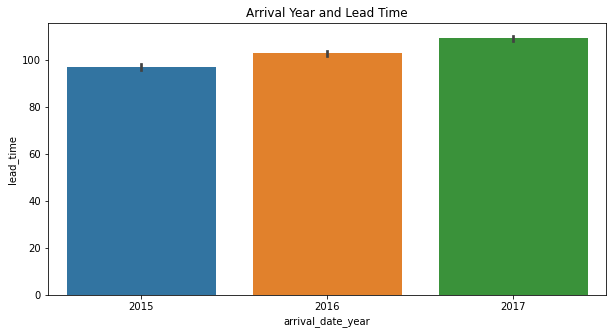

In [69]:
plt.figure(figsize = (10, 5))
sns.barplot(x = 'arrival_date_year',y = 'lead_time', data = df).set_title('Arrival Year and Lead Time')

 ### Which distribution channel is mostly preferred?

In [70]:
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

### As u can u see thier is no booking of GDS in Resort Hotel.

In [71]:
print(df[df['hotel']=='Resort Hotel']['distribution_channel'].value_counts())
print(' ')
print(df[df['hotel']=='City Hotel']['distribution_channel'].value_counts())

TA/TO        28925
Direct        7865
Corporate     3269
Undefined        1
Name: distribution_channel, dtype: int64
 
TA/TO        68945
Direct        6780
Corporate     3408
GDS            193
Undefined        4
Name: distribution_channel, dtype: int64


### Mostly Direct distribution channel is used for both hotels

In [72]:
distribution_channels=['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS']
distribution_channels1=['Direct', 'Corporate', 'TA/TO','Undefined']
resort_hotel=df[df['hotel']=='Resort Hotel']['distribution_channel'].value_counts()
city_hotel=df[df['hotel']=='City Hotel']['distribution_channel'].value_counts()

Text(0.5, 1.0, 'resort_hotel')

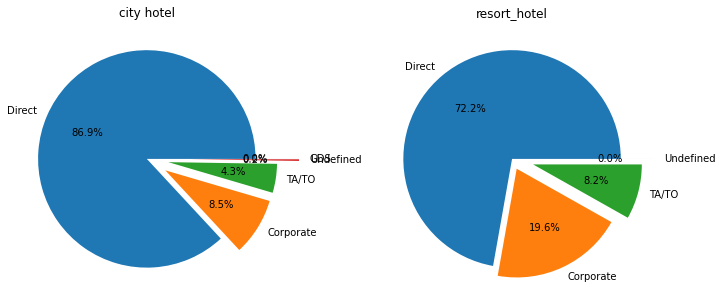

In [73]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.pie(x=city_hotel,labels=distribution_channels, data=df,explode=(0,0.2,0.2,0.4,0.4),autopct='%.1f%%');
plt.title('city hotel')

plt.subplot(1,2,2)
plt.pie(x=resort_hotel,labels=distribution_channels1,data=df,explode=(0,0.1,0.2,0.3),autopct='%.1f%%');
plt.title('resort_hotel')

### Maximum repeated guest in which hotel?

In [74]:
df.groupby('hotel')['is_repeated_guest'].value_counts()

hotel         is_repeated_guest
City Hotel    0                    77298
              1                     2032
Resort Hotel  0                    38282
              1                     1778
Name: is_repeated_guest, dtype: int64

In [75]:
z1=df[df['is_repeated_guest']==1]['hotel'].value_counts()

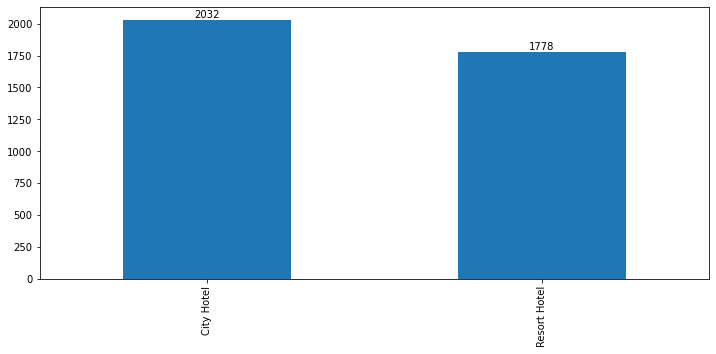

In [76]:
plt.figure(figsize=(12,5))
az=df[df['is_repeated_guest']==1]['hotel'].value_counts().plot(kind='bar')
az.bar_label(az.containers[0]);

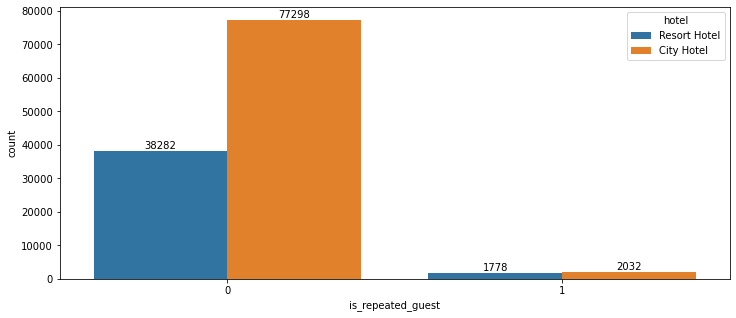

In [77]:
plt.figure(figsize=(12,5))
az=sns.countplot(x='is_repeated_guest',hue='hotel',data=df)
az.bar_label(az.containers[0]);
az.bar_label(az.containers[1]);

* From above graph as u can see maximum no of repeated guests are from City hotel.

In [78]:
df.groupby('arrival_date_year')['is_repeated_guest'].value_counts()

arrival_date_year  is_repeated_guest
2015               0                    21355
                   1                      641
2016               0                    54929
                   1                     1778
2017               0                    39296
                   1                     1391
Name: is_repeated_guest, dtype: int64

### Maximum no of guest repeated in which year?

<AxesSubplot:ylabel='arrival_date_year'>

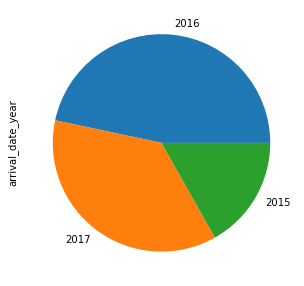

In [79]:
plt.figure(figsize=(12,5))
df[df['is_repeated_guest']==1]['arrival_date_year'].value_counts().plot(kind='pie')

### Maximum no of previous bookings not canceled according to the hotel

In [80]:
df['previous_cancellations'].unique()

array([ 0,  1,  2,  3, 26, 25, 14,  4, 24, 19,  5, 21,  6, 13, 11])

In [81]:
previous_cancellations1=df.iloc[np.where((df['hotel']=='City Hotel') & df['previous_cancellations'])]['arrival_date_year'].value_counts()
previous_cancellations2=df.iloc[np.where((df['hotel']=='Resort Hotel') & df['previous_cancellations'])]['arrival_date_year'].value_counts()

Text(0.5, 1.0, 'resort_hotel')

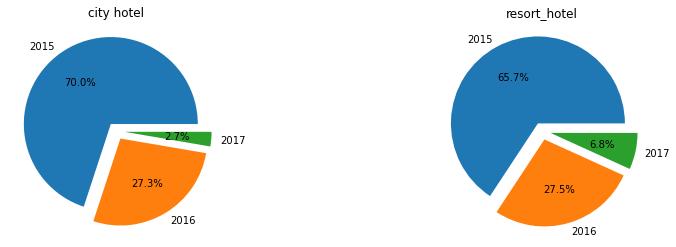

In [82]:
plt.figure(figsize=(14,4))
label=[2015,2016,2017]

plt.subplot(1,2,1)
plt.pie(x=previous_cancellations1,labels=label,explode=(0.1,0.1,0.1),data=df,autopct='%.1f%%');
plt.title('city hotel')

plt.subplot(1,2,2)
plt.pie(x=previous_cancellations2,labels=label,explode=(0.1,0.1,0.1),data=df,autopct='%.1f%%');
plt.title('resort_hotel')

In [83]:
df['previous_bookings_not_canceled'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 19, 26, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72])

In [84]:
x1=df.groupby('hotel')['previous_bookings_not_canceled'].max()

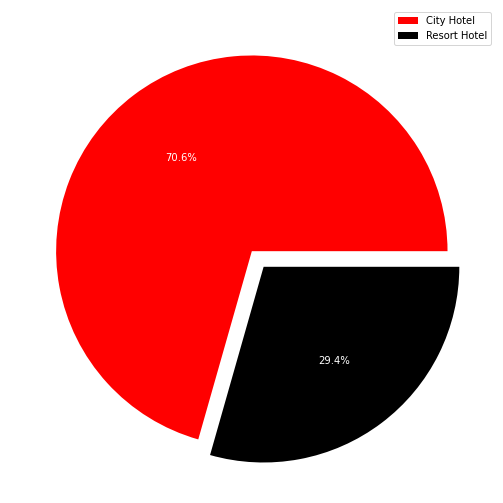

In [85]:
plt.figure(figsize=(14,9))
labels = ["City Hotel","Resort Hotel"]
plt.pie(x=x1,data=df,colors=['red','black'],labels=labels,explode=(0,0.1),textprops={"color":"w"},autopct='%.1f%%')
plt.legend(loc="upper right");

In [86]:
x2=df.groupby('arrival_date_year')['previous_bookings_not_canceled'].max()

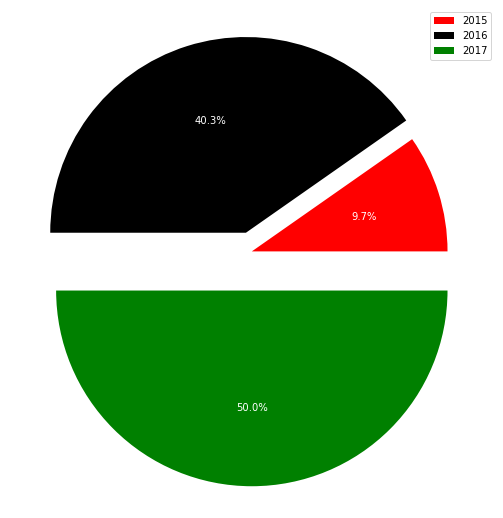

In [87]:
plt.figure(figsize=(14,9))
labels = [2015,2016,2017]
plt.pie(x=x2,data=df,colors=['red','black','green'],labels=labels,explode=(0,0.1,0.2),textprops={"color":"w"},autopct='%.1f%%')
plt.legend(loc="upper right");

### Maximum no cancellation according to the market segement

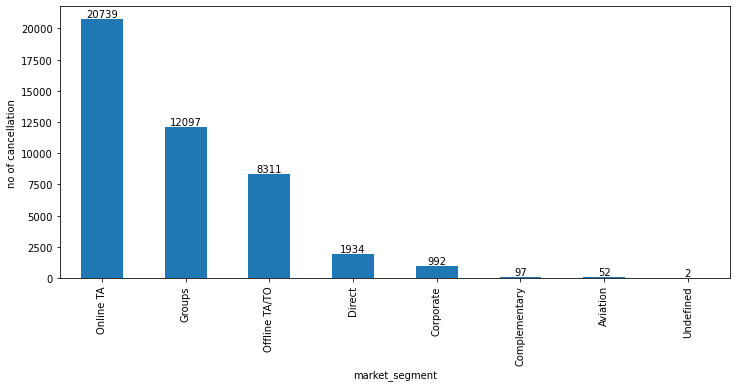

In [88]:
plt.figure(figsize=(12,5))
az=df[df["is_canceled"]==1]['market_segment'].value_counts().plot(kind='bar')
az.bar_label(az.containers[0]);
plt.xlabel('market_segment')
plt.ylabel('no of cancellation');

* Maximum no of cancellation is done in Online TA

### Which reserved_room_type is most prefered?

In [89]:
df['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

<AxesSubplot:xlabel='reserved_room_type', ylabel='count'>

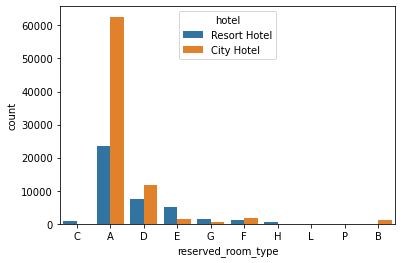

In [90]:
sns.countplot(x='reserved_room_type',hue='hotel',data=df)

In [91]:
df[df['reserved_room_type']=='A']['customer_type'].value_counts()

Transient          60948
Transient-Party    21814
Contract            2867
Group                365
Name: customer_type, dtype: int64

### What is the customer type for A reserved room type?

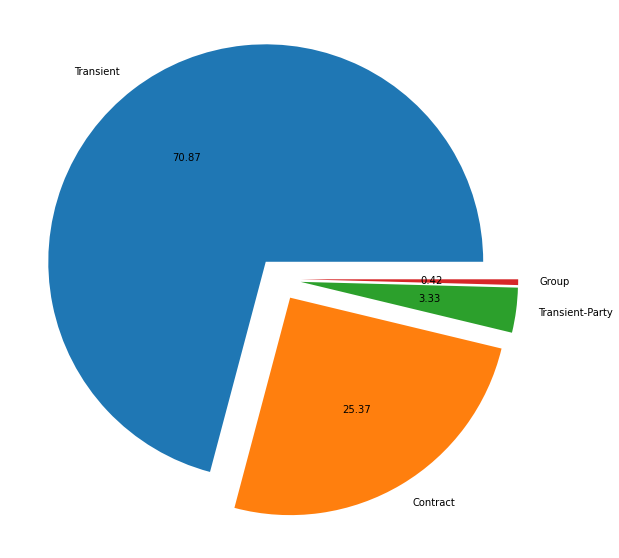

In [92]:
d1=df[df['reserved_room_type']=='A']['customer_type'].value_counts()
plt.figure(figsize =(12, 10))
plt.pie(d1,labels=df['customer_type'].unique(), explode=(0.1, 0.1, 0.1, 0.1), autopct='%.2f');

* A Type reserved_room_type is mostly preffered by the both hotels.
* Maximum Transient type are thier of A customer type.

 ### Maximum cancellation in which month?

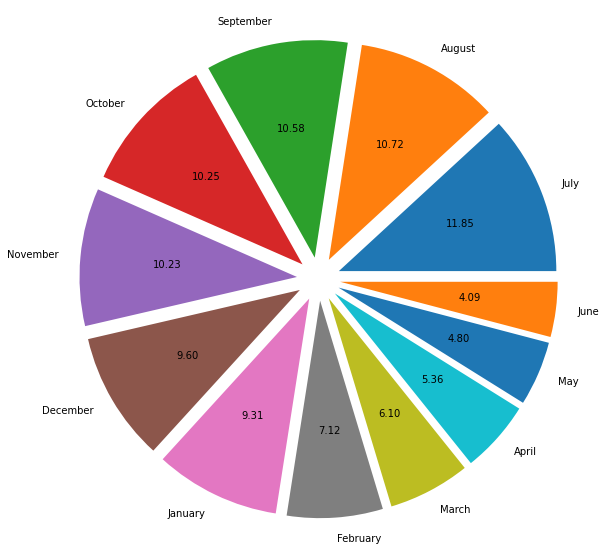

In [93]:
data = df[df['is_canceled']==1]['arrival_date_month'].value_counts()
plt.figure(figsize =(12, 10))
plt.pie(data,labels=df['arrival_date_month'].unique(), explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1), autopct='%.2f');

### Which type of room mostly assigned room type hotel?

In [94]:
df['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

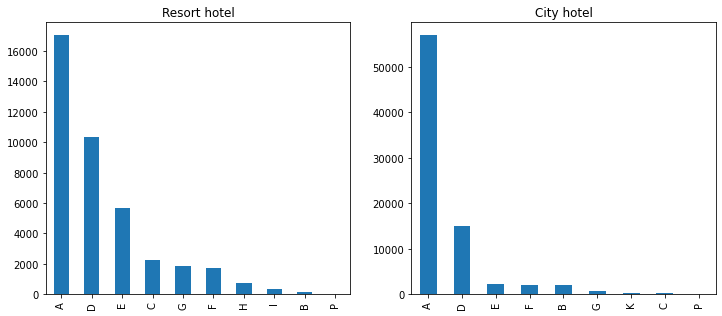

In [95]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
df[df['hotel']=='Resort Hotel']['assigned_room_type'].value_counts().head(10).plot(kind='bar')
plt.title('Resort hotel')

plt.subplot(1,2,2)
df[df['hotel']=='City Hotel']['assigned_room_type'].value_counts().head(10).plot(kind='bar')
plt.title('City hotel');


* Maximum no of A type room assigned by the by both hotel

### How many people changed their bookings?

In [96]:
df['booking_changes'].unique()

array([ 3,  4,  0,  1,  2,  5, 17,  6,  8,  7, 10, 16,  9, 13, 12, 20, 14,
       15, 11, 21, 18])

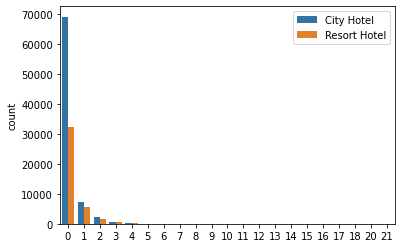

In [97]:
sns.countplot(x="booking_changes", data=df, hue="hotel", hue_order=["City Hotel","Resort Hotel"]).set(xlabel=None)
plt.legend(loc="upper right");

### Which deposit type is mostly prefered according to hotel?

In [98]:
df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [99]:
df.groupby('hotel')['deposit_type'].value_counts()

hotel         deposit_type
City Hotel    No Deposit      66442
              Non Refund      12868
              Refundable         20
Resort Hotel  No Deposit      38199
              Non Refund       1719
              Refundable        142
Name: deposit_type, dtype: int64

In [100]:
df2=df[df['hotel']=='Resort Hotel']['deposit_type'].value_counts()
df3=df[df['hotel']=='City Hotel']['deposit_type'].value_counts()

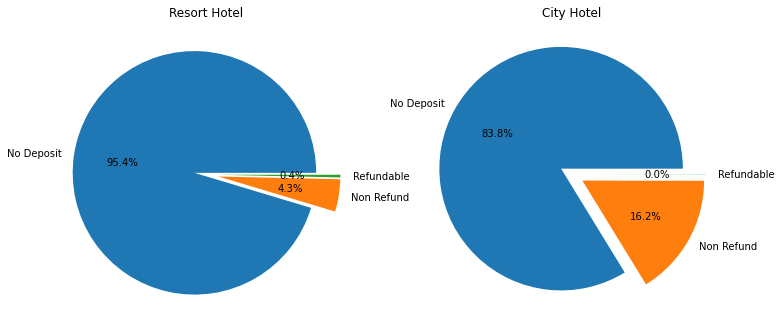

In [101]:
plt.figure(figsize=(12,10))
deposit = ["No Deposit","Non Refund","Refundable"]
plt.subplot(1,2,1)
plt.pie(x=df2,labels=deposit,explode=(0.1,0.1,0.1),data=df,autopct='%.1f%%');
plt.title('Resort Hotel')

plt.subplot(1,2,2)
plt.pie(x=df3,labels=deposit,explode=(0.1,0.1,0.1),data=df,autopct='%.1f%%');
plt.title('City Hotel');

### Maximum cancellation is from No deposit type?

<AxesSubplot:>

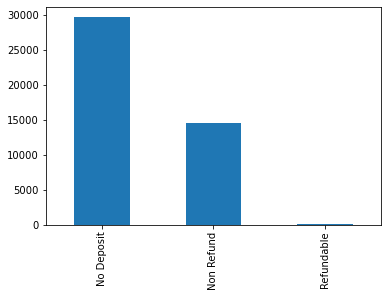

In [102]:
df[df['is_canceled']==1]['deposit_type'].value_counts().plot(kind='bar')

### Maximum days of waiting is in City Hotel and Resort Hotel?

In [103]:
df['days_in_waiting_list'].unique()

array([  0,  50,  47,  65, 122,  75, 101, 150, 125,  14,  60,  34, 100,
        22, 121,  61,  39,   5,   1,   8, 107,  43,  52,   2,  11, 142,
       116,  13,  44,  97,  83,   4, 113,  18,  20, 185,  93, 109,   6,
        37, 105, 154,  64,  99,  38,  48,  33,  77,  21,  80,  59,  40,
        58,  89,  53,  49,  69,  87,  91,  57, 111,  79,  98,  85,  63,
        15,   3,  41, 224,  31,  56, 187, 176,  71,  55,  96, 236, 259,
       207, 215, 160, 120,  30,  32,  27,  62,  24, 108, 147, 379,  70,
        35, 178, 330, 223, 174, 162, 391,  68, 193,  10,  76,  16,  28,
         9, 165,  17,  25,  46,   7,  84, 175, 183,  23, 117,  12,  54,
        26,  73,  45,  19,  42,  72,  81,  92,  74, 167,  36])

<AxesSubplot:xlabel='hotel'>

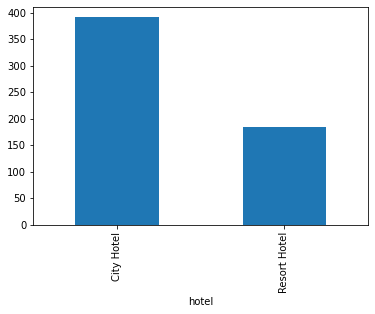

In [104]:
df.groupby('hotel')['days_in_waiting_list'].max().plot(kind='bar')

* City Hotel : 391 maximum days in waiting list
* Resort Hotel : 185 maximum days in waiting list

### Required car parking spaces?

In [105]:
df['required_car_parking_spaces'].unique()

array([0, 1, 2, 8, 3])

<AxesSubplot:xlabel='required_car_parking_spaces', ylabel='count'>

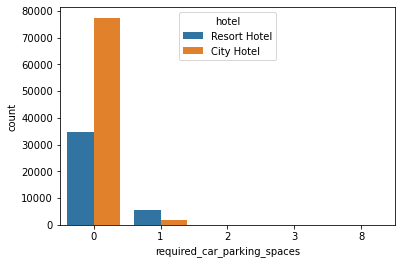

In [106]:
sns.countplot(x='required_car_parking_spaces',hue='hotel',data=df)

* Most of the guests do not required parking space

### Which room is more costly?

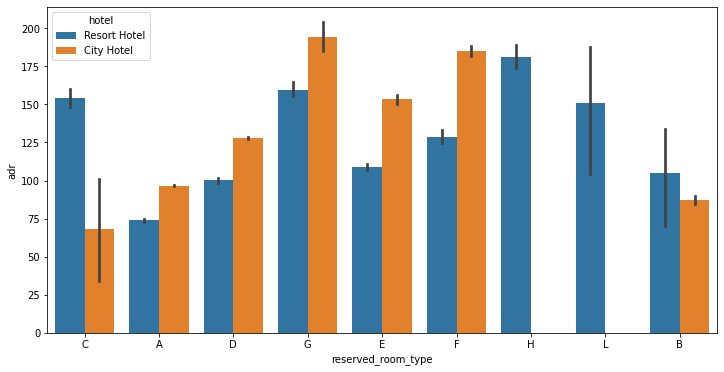

In [107]:
plt.figure(figsize=(12,6))
ds=df[df['is_canceled']==0]
sns.barplot(x = 'reserved_room_type', y = 'adr',data=ds,hue='hotel');

### How many special requests of both hotels?

In [108]:
df.groupby('hotel')['total_of_special_requests'].value_counts()

hotel         total_of_special_requests
City Hotel    0                            47957
              1                            21420
              2                             8142
              3                             1587
              4                              198
              5                               26
Resort Hotel  0                            22361
              1                            11806
              2                             4827
              3                              910
              4                              142
              5                               14
Name: total_of_special_requests, dtype: int64

### Maximum cancellation of total of special requests?

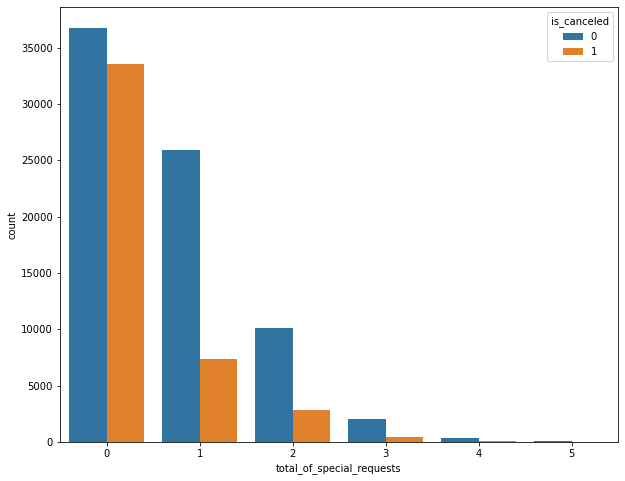

In [109]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='total_of_special_requests',hue='is_canceled');

### Reservation status according to the year?

In [110]:
df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [111]:
dk1=df[df['arrival_date_year']==2015]['reservation_status'].value_counts()
dk2=df[df['arrival_date_year']==2016]['reservation_status'].value_counts()
dk3=df[df['arrival_date_year']==2017]['reservation_status'].value_counts()

Text(0.5, 1.0, '2017')

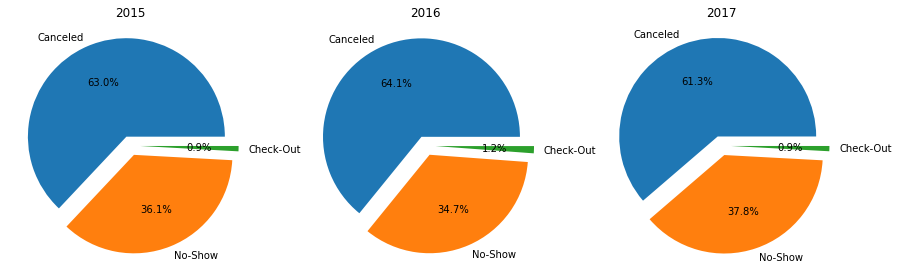

In [112]:
reservation=['Canceled','No-Show','Check-Out']
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.pie(x=dk1,labels=reservation,explode=(0.1,0.1,0.1),data=df,autopct='%.1f%%');
plt.title('2015')

plt.subplot(1,3,2)
plt.pie(x=dk2,labels=reservation,explode=(0.1,0.1,0.1),data=df,autopct='%.1f%%');
plt.title('2016')

plt.subplot(1,3,3)
plt.pie(x=dk3,labels=reservation,explode=(0.1,0.1,0.1),data=df,autopct='%.1f%%');
plt.title('2017')


### Reservation status according to reservation status date?

In [113]:
df.groupby('reservation_status')['reservation_status_date'].value_counts().sort_values(ascending=False)

reservation_status  reservation_status_date
Canceled            2015-10-21                 1371
                    2015-07-06                  781
                    2015-01-01                  763
                    2016-11-25                  710
                    2016-01-18                  591
                                               ... 
No-Show             2016-01-15                    1
                    2016-01-19                    1
                    2016-01-30                    1
                    2016-01-31                    1
                    2017-08-26                    1
Name: reservation_status_date, Length: 2195, dtype: int64

### Maximum no of cancled is on 2015-10-21

<AxesSubplot:>

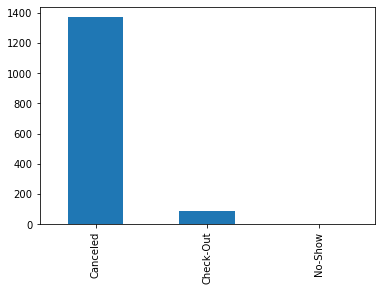

In [114]:
df[df['reservation_status_date']=='2015-10-21']['reservation_status'].value_counts().plot(kind='bar')

### Number of adults in each Hotel

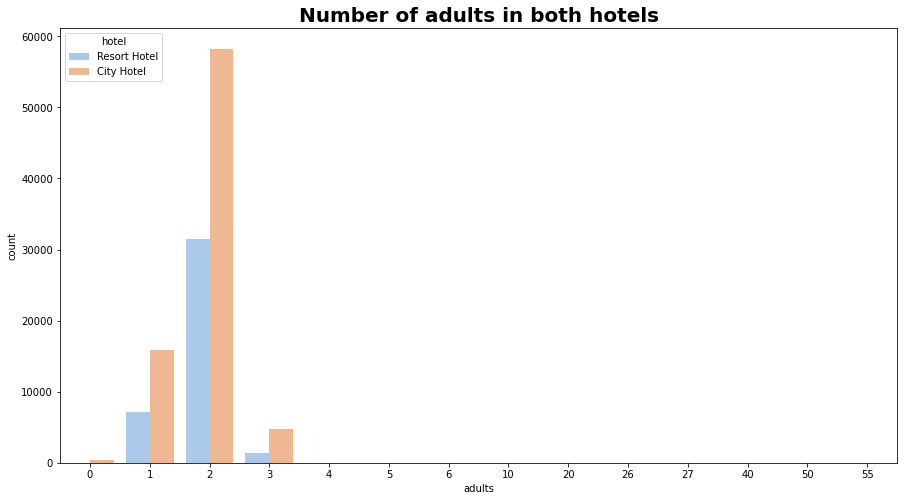

In [115]:
plt.figure(figsize=(15, 8))

sns.countplot(x='adults',hue='hotel', data=df,palette='pastel')
plt.title("Number of adults in both hotels",fontweight="bold", size=20);


# Upvote if you like insights